# Random Forest

### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

### Loading the Dataset

The dataset we use to train the model is originally from the NOAA's Climate Data Online tool of temperatures in Seattle, Washington. The objective is to predict the temperature in the city based on the features given.

In [2]:
data = pd.read_csv('temps.csv')
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### One-Hot Encoding

One Hot encoding takes in the categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value. Instead, we change the single column of weekdays into seven columns of binary data.

In [3]:
#One hot encoding days
data = pd.get_dummies(data)
data.iloc[:, 5:]

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### Feature Selection

Here we assign the relevent columns of data which will be used for training. Since we're predicting the outcome, all the columns are set as 'features' while the 'actual temperature' is set as 'labels'. The dataset will also be converted to a numpy array.

In [4]:
labels = np.array(data['actual']) #We want to predict

features = data.drop('actual', axis=1)
feature_list = list(features.columns)
features = np.array(features)

### Splitting the data

Testing is crucial for any machine learning model as it allows us to make changes and increase its accuracy. We divide our data into two different sets: "Test" and "Train" in a 7:3 ratio; 70% of the data will be used for training, while 30% will be used for testing.

To make sure the model is predicting the outcome on the basis of different dependencies of data and not just straight up learning it, we don't use testing data to fit the model. Finding out the accuracy using unseen data give us the true reading about the model trained.

Divvying out the data is easy thanks to the Scikit-learn library, which is used extensively in implementing data preprocessing techniques and machine leanring models itself.

In [5]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=69)

### Creating the Model

Time to create the Random Forest Model. We'll be using the Scikit-learn library to define, train, and predict the results of the model.

In [6]:
#Creating the model
model = RandomForestRegressor(n_estimators = 1000, random_state = 69)

### Training the Model

Next, we train the model using the one-liner code below.

In [7]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=69)

### Predicting the model

Once the model is trained, we'll predict the "Outcome" using the test data.

In [8]:
y_pred = model.predict(x_test)

### Calculating Accuracy

The predictions will be pitted against the actual values to find out how good is the model.

In [9]:
err = abs(y_pred - y_test)
errPer = 100 * err / y_test
acc = 100 - np.mean(errPer)
print(f'Accuracy of the Random Forest Model: {acc:.2f}%')

Accuracy of the Random Forest Model: 94.07%


### Visualizing the Model

Once of best things about the Random Forest is that it is a white box model where we get to know the actual internal working inside the model, unlike the neural networks. This means that we can easily visualize the model using some libraries.

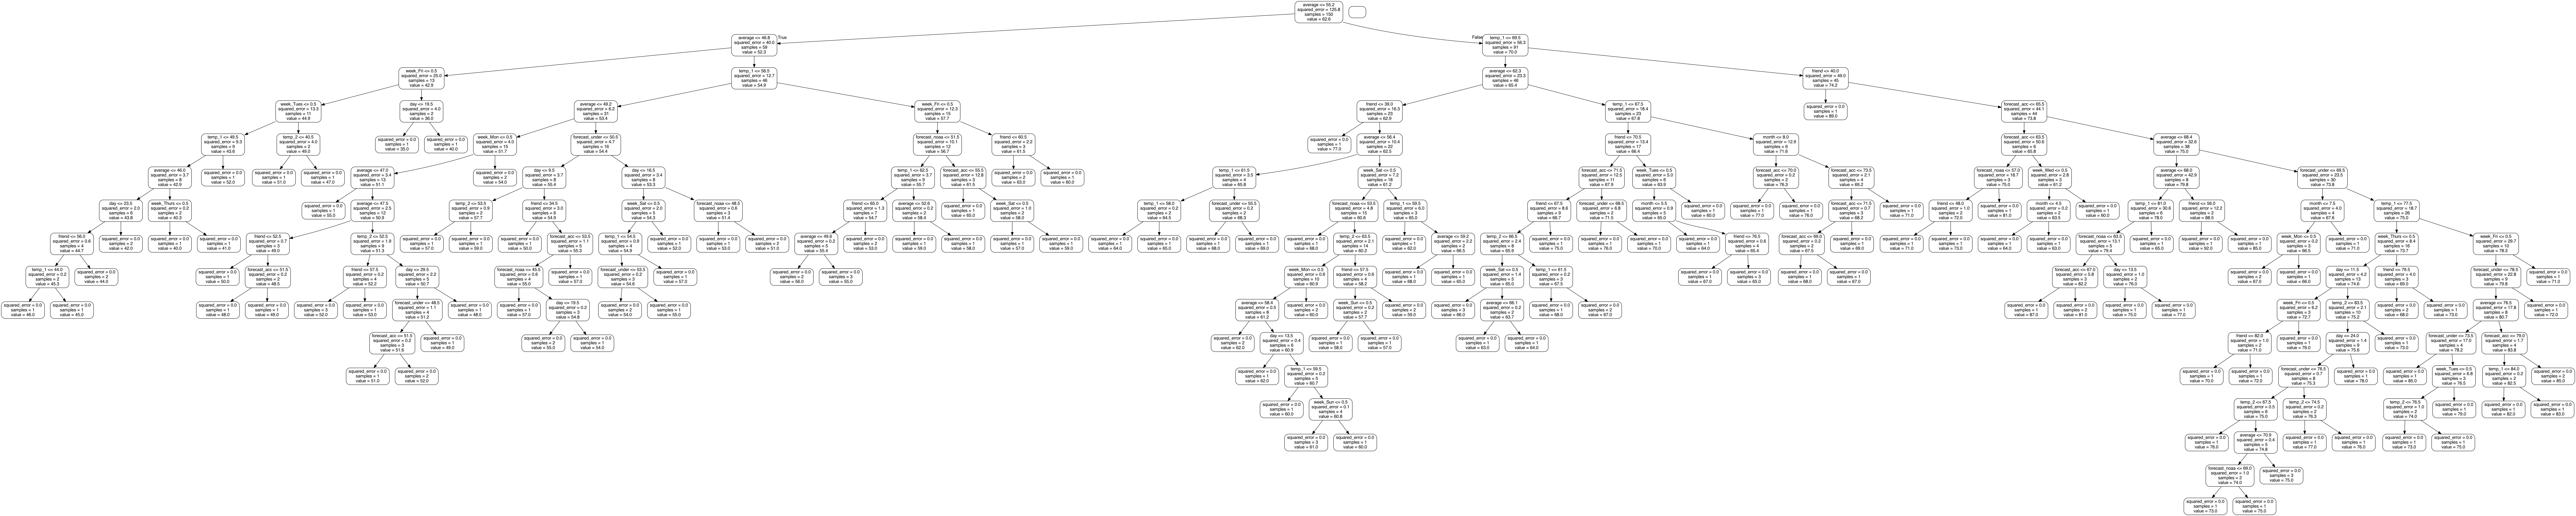

In [10]:
tree = model.estimators_[7]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('images/tree.png')
Image('images/tree.png')

### Optimizing the Model

Random Forest can be optimized in various ways. Here we are limiting the maximum depth to 5.A high value might cause overfitting and a lower one might cause underfitting, so the trick is to find the sweet spot. It can defined by setting max_depth="<Int>"

In [11]:
model_opt = RandomForestRegressor(n_estimators=10, max_depth = 5)

### Training and Predicting the Outcome

Like before, we have scikit-learn to our rescue as we use one-line codes to fit the model and get the outcome from the test data

In [12]:
model_opt.fit(x_train, y_train)
y_predOptimized = model_opt.predict(x_test)

### Calculating Accuracy

Finally, we calculate the accuracy of the new model.

In [13]:
err = abs(y_predOptimized - y_test)
errPer = 100 * err / y_test
acc = 100 - np.mean(errPer)
print(f'Accuracy of the Random Forest Model: {acc:.2f}%')

Accuracy of the Random Forest Model: 93.88%


### Visualizing the Model

As before, we can the new model as well.

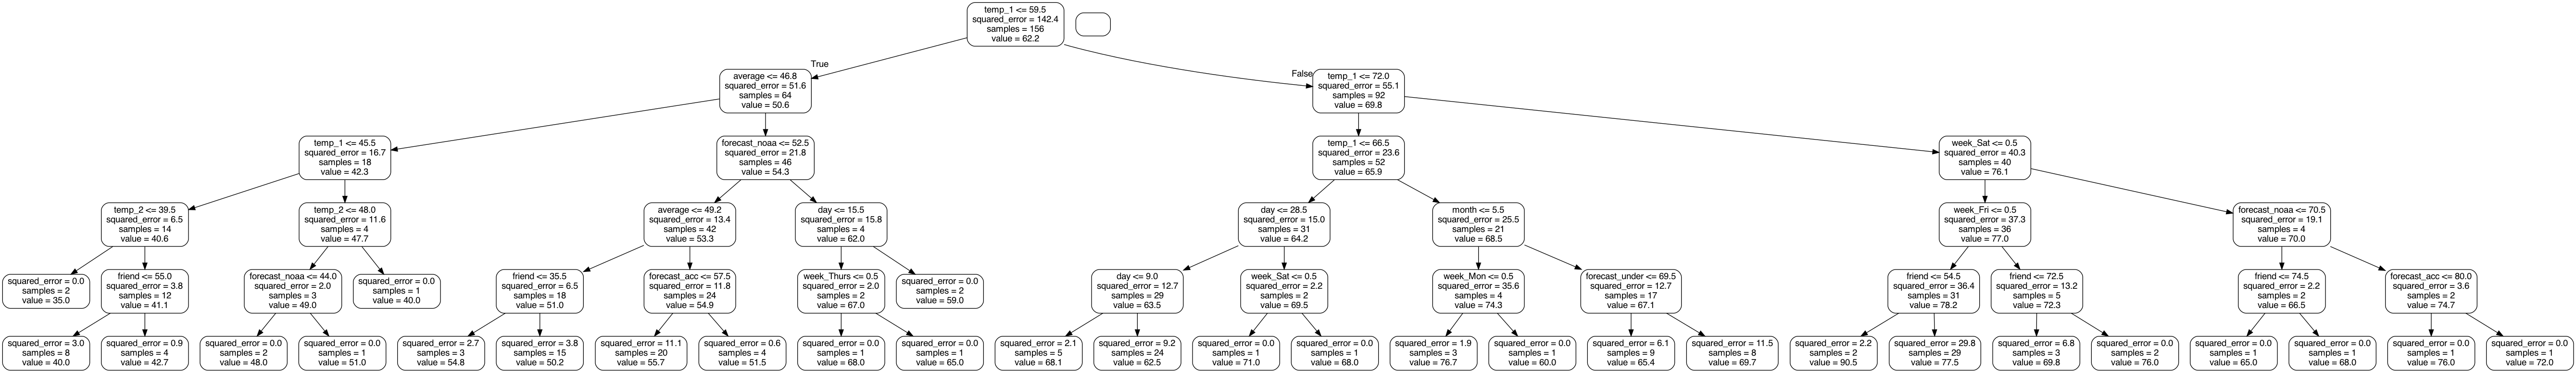

In [14]:
tree_small = model_opt.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('images/small_tree.png')
Image('images/small_tree.png')

# That's it!

Voila! The Random Forest Regressor model is created, trained, and tested.